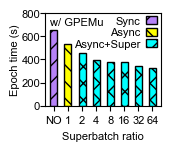

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=8

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize


n_groups = 4
columns = ['superbatch', 'epoch_time']

df = pd.read_csv('data.csv', sep='\t', header=None, names=columns)

superbatch = df['superbatch'].to_list()
epoch_time = df['epoch_time'].to_list()

colors = ['#B682F8', 'yellow', 'cyan']
labels = ['Sync', 'Async', 'Async+Super']
hatches = ["//", "\\\\", "xx"]

# create plot
fig, ax1 = plt.subplots(1, 1)

ax1.set_ylim(0,800)

bar_width = 0.5

plt.bar('NO', epoch_time[0], color=colors[0], width=bar_width, hatch=hatches[0], edgecolor="black", label=labels[0])
plt.bar('1', epoch_time[1], color=colors[1], width=bar_width, hatch=hatches[1], edgecolor="black", label=labels[1])
plt.bar('{}'.format(superbatch[2]), epoch_time[2], color=colors[2], width=bar_width, hatch=hatches[2], edgecolor="black", label=labels[2])

for i in range(3, len(epoch_time), 1):
    plt.bar('{}'.format(superbatch[i]), epoch_time[i], color=colors[2], width=bar_width, hatch=hatches[2], edgecolor="black")


ax1.set_ylabel('Epoch time (s)', fontsize=fontsize, labelpad=1)
ax1.set_xlabel('Superbatch ratio', fontsize=fontsize, x=0.5)
ax1.yaxis.set_tick_params(pad=0)

# plt.xticks(xtics, xlabels)

# legend reverse order
handles, labels = ax1.get_legend_handles_labels()
order = [0, 1, 2]
ax1.legend([handles[idx] for idx in order],
           [labels[idx] for idx in order],
           markerfirst=False, bbox_to_anchor=(1.052, 1.08), frameon=False, 
           ncol=1, handlelength=1, markerscale=0.5, handletextpad=0.5, 
           labelspacing=0.15, loc="upper right")

plt.annotate("w/ GPEMu", xy=(0, 400), xytext=(-0.3, 700),fontsize=fontsize)


fig.set_size_inches(1.5, 1.2)
fig.set_dpi(100)

plt.savefig('figure.eps',  bbox_inches='tight')

plt.show()